# Example 1: Sampling triplets from image dataset
In this notebook, we'll demonstrate how to sample triplets for training a Tile2Vec model from an image dataset.

In [3]:
import sys
sys.path.append('../')

In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt
from src.sample_tiles import *
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In the workflow detailed in our paper, we exported NAIP imagery over Central California in a bunch of GeoTIFF files (the usual format with Google Earth Engine). We'll walk through sampling tiles from GeoTIFFs here, but a similar workflow can apply to other file formats as well.

Note that this notebook requires the user to have GDAL installed.

The sampling of triplet tiles can happen with an arbitrary number of images. The focus of our functions is on efficiency and scalability, since the overall area covered quite large and loading all images into memory is not advised. The process is broken down into:

1. Sampling triplets of images
2. Loading images one at a time and sampling tile centers from them
3. Extracting tiles given the tile center and radius

For simplicity, here we'll assume we're sampling from just 1 GeoTIFF file.

## Step 1. Sample image names

We assume that the anchor tile and neighbor tile will come from the same image, and the distant tile may or may not come from the same image. Therefore to sample $n$ triplets, we first sample $2n$ image names from which to sample tiles.

Let's sample 20 tiles.

In [7]:
img_dir = '../data/test-planet-lab/' # directory where images are saved
img_triplets = get_triplet_imgs(img_dir, n_triplets=500, img_ext='.tif')
print(img_triplets[:5,:])

[['20190306_045653_0e26_3B_AnalyticMS.tif'
  '20190306_045653_0e26_3B_AnalyticMS.tif']
 ['20190306_045653_0e26_3B_AnalyticMS.tif'
  '20190306_045653_0e26_3B_AnalyticMS.tif']
 ['20190306_045653_0e26_3B_AnalyticMS.tif'
  '20190306_045653_0e26_3B_AnalyticMS.tif']
 ['20190306_045653_0e26_3B_AnalyticMS.tif'
  '20190306_045653_0e26_3B_AnalyticMS.tif']
 ['20190306_045653_0e26_3B_AnalyticMS.tif'
  '20190306_045653_0e26_3B_AnalyticMS.tif']]


Since we only have one image, all tiles are coming from 0.tif.

## Steps 2 & 3. Load images, sample tile centers, and extract tiles

Next we feed the list of images into the get_triplet_tiles function, which loads in each image sequentially and samples tile centers for all tiles that come from that image. This way a given image is only loaded once.

In [8]:
tile_dir = '../data/pm25' # where you want to save your tiles
tiles = get_triplet_tiles(tile_dir,
                          img_dir, 
                          img_triplets, 
                          tile_size=50,
                          val_type='uint8',
                          bands_only=True,
                          save=True,
                          verbose=True)

Sampling image 20190306_045653_0e26_3B_AnalyticMS.tif
    Saving anchor and neighbor tile #0
    Anchor tile center:(4217, 7968)
    Neighbor tile center:(4217, 7976)
    Saving distant tile #0
    Distant tile center:(2415, 361)
    Saving anchor and neighbor tile #1
    Anchor tile center:(1039, 8877)
    Neighbor tile center:(1135, 8967)
    Saving distant tile #1
    Distant tile center:(3156, 3657)
    Saving anchor and neighbor tile #2
    Anchor tile center:(3407, 2022)
    Neighbor tile center:(3315, 1970)
    Saving distant tile #2
    Distant tile center:(3169, 5952)
    Saving anchor and neighbor tile #3
    Anchor tile center:(1015, 7763)
    Neighbor tile center:(956, 7799)
    Saving distant tile #3
    Distant tile center:(813, 1483)
    Saving anchor and neighbor tile #4
    Anchor tile center:(1256, 8947)
    Neighbor tile center:(1159, 8879)
    Saving distant tile #4
    Distant tile center:(3694, 4347)
    Saving anchor and neighbor tile #5
    Anchor tile center:(1

    Saving distant tile #48
    Distant tile center:(3080, 5224)
    Saving anchor and neighbor tile #49
    Anchor tile center:(2861, 336)
    Neighbor tile center:(2811, 347)
    Saving distant tile #49
    Distant tile center:(2600, 1449)
    Saving anchor and neighbor tile #50
    Anchor tile center:(4011, 7801)
    Neighbor tile center:(3968, 7753)
    Saving distant tile #50
    Distant tile center:(604, 2916)
    Saving anchor and neighbor tile #51
    Anchor tile center:(1447, 6683)
    Neighbor tile center:(1417, 6695)
    Saving distant tile #51
    Distant tile center:(1182, 3433)
    Saving anchor and neighbor tile #52
    Anchor tile center:(997, 413)
    Neighbor tile center:(1061, 447)
    Saving distant tile #52
    Distant tile center:(3384, 4334)
    Saving anchor and neighbor tile #53
    Anchor tile center:(3573, 6147)
    Neighbor tile center:(3644, 6077)
    Saving distant tile #53
    Distant tile center:(582, 2063)
    Saving anchor and neighbor tile #54
    Anc

    Saving anchor and neighbor tile #114
    Anchor tile center:(3923, 8175)
    Neighbor tile center:(3984, 8227)
    Saving distant tile #114
    Distant tile center:(852, 1073)
    Saving anchor and neighbor tile #115
    Anchor tile center:(3106, 7608)
    Neighbor tile center:(3111, 7690)
    Saving distant tile #115
    Distant tile center:(2352, 8019)
    Saving anchor and neighbor tile #116
    Anchor tile center:(1348, 6292)
    Neighbor tile center:(1311, 6345)
    Saving distant tile #116
    Distant tile center:(2129, 3988)
    Saving anchor and neighbor tile #117
    Anchor tile center:(562, 3727)
    Neighbor tile center:(515, 3749)
    Saving distant tile #117
    Distant tile center:(2624, 1571)
    Saving anchor and neighbor tile #118
    Anchor tile center:(2316, 4555)
    Neighbor tile center:(2366, 4500)
    Saving distant tile #118
    Distant tile center:(412, 378)
    Saving anchor and neighbor tile #119
    Anchor tile center:(3162, 7194)
    Neighbor tile cente

    Saving distant tile #168
    Distant tile center:(1789, 2154)
    Saving anchor and neighbor tile #169
    Anchor tile center:(93, 5694)
    Neighbor tile center:(25, 5643)
    Saving distant tile #169
    Distant tile center:(287, 1374)
    Saving anchor and neighbor tile #170
    Anchor tile center:(2157, 2498)
    Neighbor tile center:(2230, 2497)
    Saving distant tile #170
    Distant tile center:(555, 2830)
    Saving anchor and neighbor tile #171
    Anchor tile center:(2303, 2969)
    Neighbor tile center:(2340, 2986)
    Saving distant tile #171
    Distant tile center:(106, 2160)
    Saving anchor and neighbor tile #172
    Anchor tile center:(1101, 8894)
    Neighbor tile center:(1017, 8878)
    Saving distant tile #172
    Distant tile center:(3896, 6334)
    Saving anchor and neighbor tile #173
    Anchor tile center:(3385, 7150)
    Neighbor tile center:(3320, 7230)
    Saving distant tile #173
    Distant tile center:(3869, 8449)
    Saving anchor and neighbor tile 

    Saving distant tile #227
    Distant tile center:(3048, 1600)
    Saving anchor and neighbor tile #228
    Anchor tile center:(2322, 4556)
    Neighbor tile center:(2402, 4517)
    Saving distant tile #228
    Distant tile center:(2519, 4063)
    Saving anchor and neighbor tile #229
    Anchor tile center:(348, 5206)
    Neighbor tile center:(322, 5117)
    Saving distant tile #229
    Distant tile center:(3904, 8284)
    Saving anchor and neighbor tile #230
    Anchor tile center:(3692, 6545)
    Neighbor tile center:(3697, 6567)
    Saving distant tile #230
    Distant tile center:(565, 8180)
    Saving anchor and neighbor tile #231
    Anchor tile center:(4187, 6069)
    Neighbor tile center:(4246, 6154)
    Saving distant tile #231
    Distant tile center:(2787, 2444)
    Saving anchor and neighbor tile #232
    Anchor tile center:(1505, 3187)
    Neighbor tile center:(1406, 3195)
    Saving distant tile #232
    Distant tile center:(2190, 8270)
    Saving anchor and neighbor t

    Saving anchor and neighbor tile #285
    Anchor tile center:(3622, 8122)
    Neighbor tile center:(3620, 8057)
    Saving distant tile #285
    Distant tile center:(144, 5973)
    Saving anchor and neighbor tile #286
    Anchor tile center:(2188, 8555)
    Neighbor tile center:(2166, 8487)
    Saving distant tile #286
    Distant tile center:(4020, 4537)
    Saving anchor and neighbor tile #287
    Anchor tile center:(2181, 3059)
    Neighbor tile center:(2209, 3093)
    Saving distant tile #287
    Distant tile center:(3885, 877)
    Saving anchor and neighbor tile #288
    Anchor tile center:(4055, 5585)
    Neighbor tile center:(4038, 5654)
    Saving distant tile #288
    Distant tile center:(4187, 766)
    Saving anchor and neighbor tile #289
    Anchor tile center:(2031, 3941)
    Neighbor tile center:(1949, 4024)
    Saving distant tile #289
    Distant tile center:(3102, 183)
    Saving anchor and neighbor tile #290
    Anchor tile center:(2238, 7340)
    Neighbor tile cent

    Saving distant tile #333
    Distant tile center:(2198, 7585)
    Saving anchor and neighbor tile #334
    Anchor tile center:(1762, 8123)
    Neighbor tile center:(1671, 8080)
    Saving distant tile #334
    Distant tile center:(475, 5565)
    Saving anchor and neighbor tile #335
    Anchor tile center:(850, 1032)
    Neighbor tile center:(863, 1089)
    Saving distant tile #335
    Distant tile center:(1050, 1532)
    Saving anchor and neighbor tile #336
    Anchor tile center:(3411, 3329)
    Neighbor tile center:(3389, 3277)
    Saving distant tile #336
    Distant tile center:(2930, 3758)
    Saving anchor and neighbor tile #337
    Anchor tile center:(3075, 1538)
    Neighbor tile center:(3171, 1494)
    Saving distant tile #337
    Distant tile center:(1439, 5821)
    Saving anchor and neighbor tile #338
    Anchor tile center:(983, 3566)
    Neighbor tile center:(975, 3511)
    Saving distant tile #338
    Distant tile center:(2815, 5631)
    Saving anchor and neighbor til

    Saving distant tile #387
    Distant tile center:(1400, 4056)
    Saving anchor and neighbor tile #388
    Anchor tile center:(2474, 3322)
    Neighbor tile center:(2412, 3244)
    Saving distant tile #388
    Distant tile center:(2350, 4699)
    Saving anchor and neighbor tile #389
    Anchor tile center:(2933, 5699)
    Neighbor tile center:(2866, 5787)
    Saving distant tile #389
    Distant tile center:(1813, 1451)
    Saving anchor and neighbor tile #390
    Anchor tile center:(1455, 5351)
    Neighbor tile center:(1539, 5445)
    Saving distant tile #390
    Distant tile center:(66, 7970)
    Saving anchor and neighbor tile #391
    Anchor tile center:(682, 3912)
    Neighbor tile center:(610, 3827)
    Saving distant tile #391
    Distant tile center:(2382, 8779)
    Saving anchor and neighbor tile #392
    Anchor tile center:(693, 8691)
    Neighbor tile center:(628, 8696)
    Saving distant tile #392
    Distant tile center:(3337, 6515)
    Saving anchor and neighbor tile

    Saving anchor and neighbor tile #448
    Anchor tile center:(1302, 4072)
    Neighbor tile center:(1316, 4170)
    Saving distant tile #448
    Distant tile center:(531, 8666)
    Saving anchor and neighbor tile #449
    Anchor tile center:(4073, 7196)
    Neighbor tile center:(4155, 7184)
    Saving distant tile #449
    Distant tile center:(1602, 2409)
    Saving anchor and neighbor tile #450
    Anchor tile center:(3559, 8683)
    Neighbor tile center:(3556, 8693)
    Saving distant tile #450
    Distant tile center:(2571, 1878)
    Saving anchor and neighbor tile #451
    Anchor tile center:(2941, 2738)
    Neighbor tile center:(3036, 2751)
    Saving distant tile #451
    Distant tile center:(2507, 7745)
    Saving anchor and neighbor tile #452
    Anchor tile center:(3288, 4439)
    Neighbor tile center:(3244, 4510)
    Saving distant tile #452
    Distant tile center:(3551, 5489)
    Saving anchor and neighbor tile #453
    Anchor tile center:(399, 2023)
    Neighbor tile ce

    Saving distant tile #494
    Distant tile center:(1722, 5421)
    Saving anchor and neighbor tile #495
    Anchor tile center:(2735, 3234)
    Neighbor tile center:(2758, 3229)
    Saving distant tile #495
    Distant tile center:(3054, 1068)
    Saving anchor and neighbor tile #496
    Anchor tile center:(2994, 6192)
    Neighbor tile center:(2958, 6279)
    Saving distant tile #496
    Distant tile center:(1573, 3506)
    Saving anchor and neighbor tile #497
    Anchor tile center:(989, 6352)
    Neighbor tile center:(1036, 6262)
    Saving distant tile #497
    Distant tile center:(3202, 1883)
    Saving anchor and neighbor tile #498
    Anchor tile center:(2536, 5922)
    Neighbor tile center:(2530, 6021)
    Saving distant tile #498
    Distant tile center:(1577, 2101)
    Saving anchor and neighbor tile #499
    Anchor tile center:(1431, 257)
    Neighbor tile center:(1333, 260)
    Saving distant tile #499
    Distant tile center:(2991, 6720)


## Visualize some tiles!

In [16]:
tile_dir = '../data.nosync/planet-lab-tiles/high/'
i = 10
tile = np.load(os.path.join(tile_dir, 'planet_tile_1216_044827_' + str(i) + '.npy'))

In [17]:
tile.shape

(50, 50, 4)

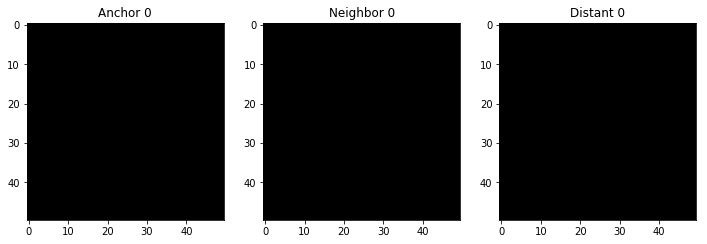

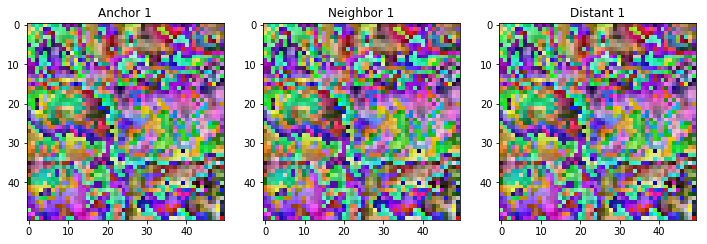

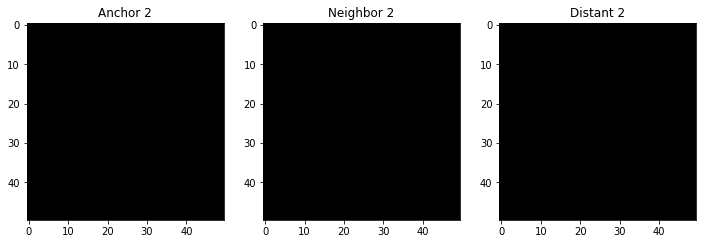

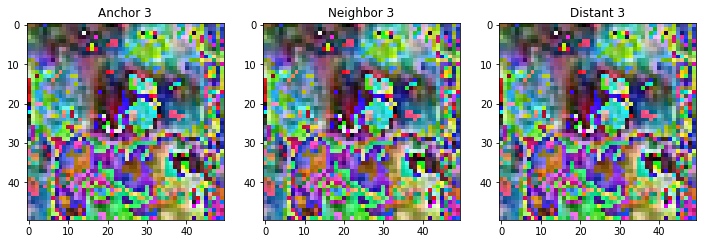

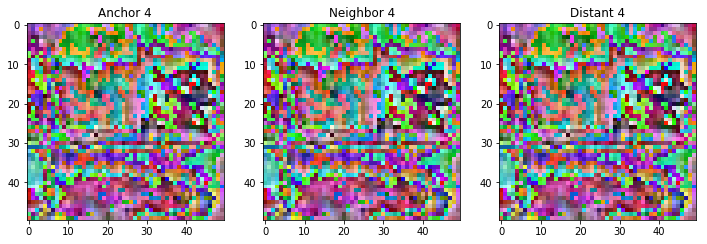

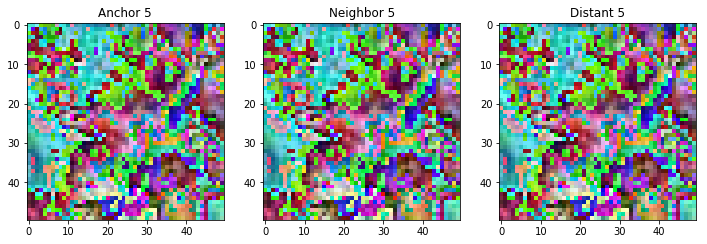

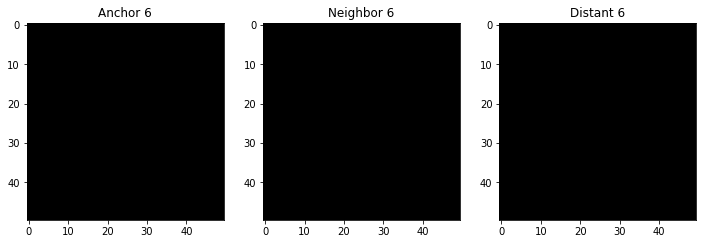

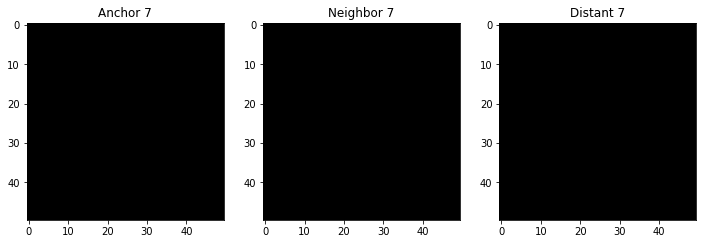

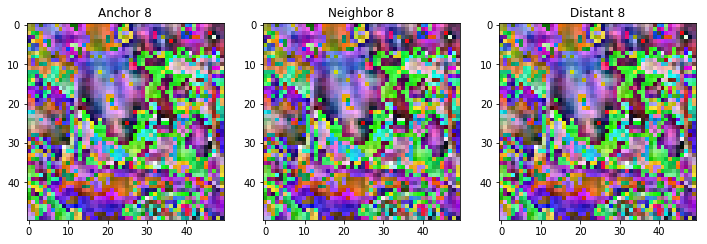

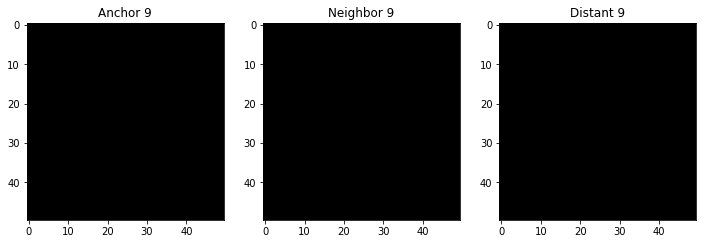

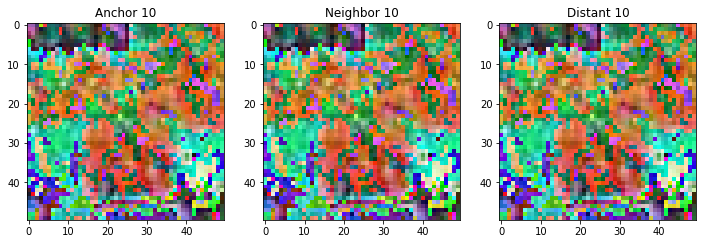

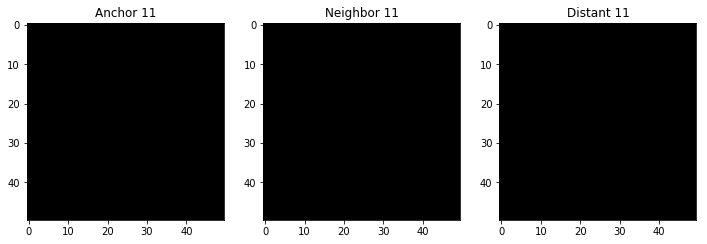

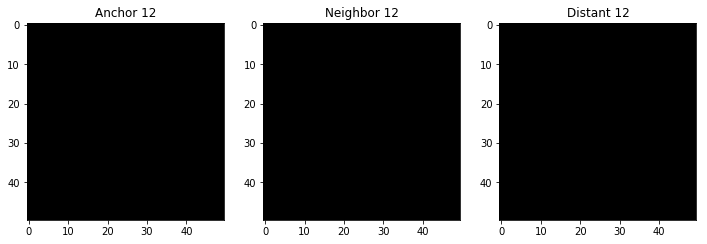

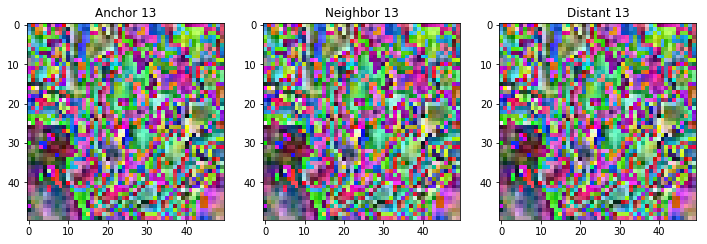

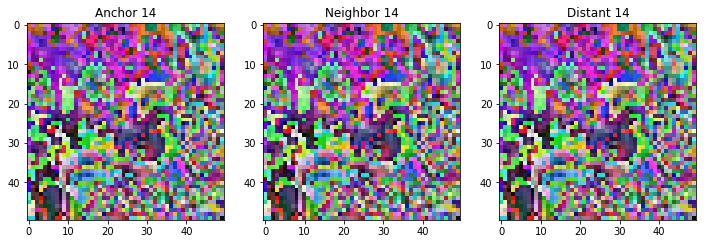

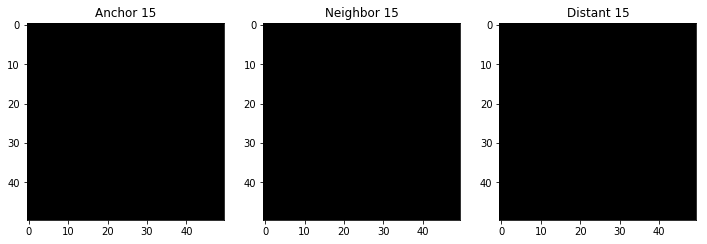

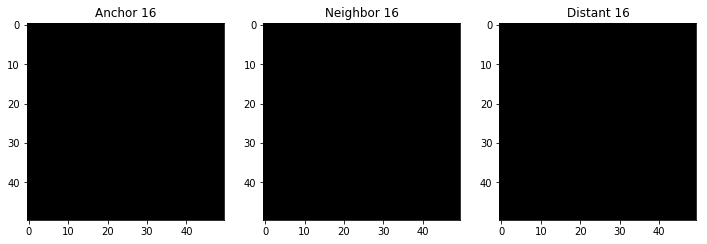

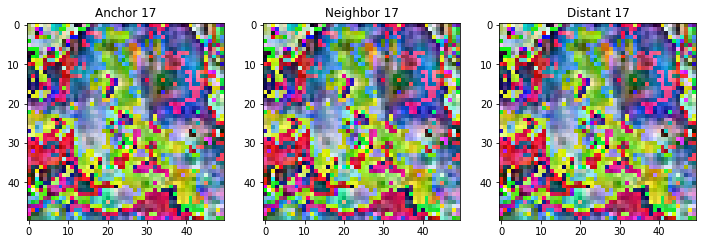

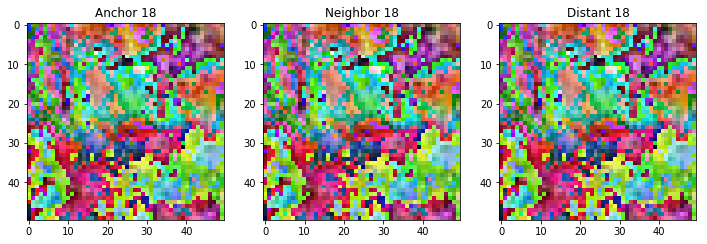

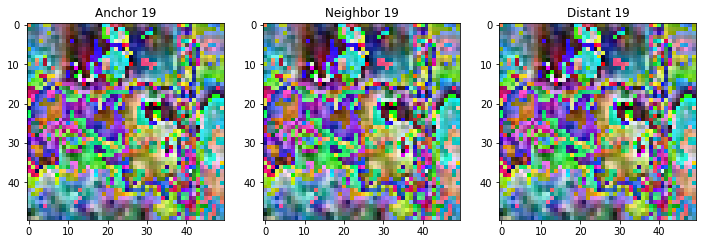

In [8]:
tile_dir = '../data.nosync/planet-lab-tiles/high/'
n_triplets = 2
plt.rcParams['figure.figsize'] = (12,4)
for i in range(0,20):
#i = 4
#if True:    
    tile = np.load(os.path.join(tile_dir, 'planet_tile_1216_044827_' + str(i) + '.npy'))
#    neighbor = np.load(os.path.join(tile_dir, str(i)+'neighbor.npy'))
#    distant = np.load(os.path.join(tile_dir, str(i)+'distant.npy'))
    
    #vmin = np.array([tile, neighbor, distant]).min()
    #vmax = np.array([tile, neighbor, distant]).max()
    
    plt.figure()
    plt.subplot(1,3,1)
    plt.imshow(tile[:,:,[0,1,2]])
    plt.title('Anchor '+str(i))
    plt.subplot(1,3,2)
    plt.imshow(tile[:,:,[0,1,2]])
    plt.title('Neighbor '+str(i))
    plt.subplot(1,3,3)
    plt.imshow(tile[:,:,[0,1,2]])
    plt.title('Distant '+str(i))

Looks like we got what we wanted. The anchor and neighbor tiles look like they belong to the same class, and are different from the distant tile.